Data Ingestion

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Data Import

In [2]:
df=pd.read_csv("LS_2.0.csv")

In [3]:
df.head(5)

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690


In [4]:
df.shape

(2263, 19)

In [5]:
df.dtypes

STATE                                         object
CONSTITUENCY                                  object
NAME                                          object
WINNER                                         int64
PARTY                                         object
SYMBOL                                        object
GENDER                                        object
CRIMINAL\nCASES                               object
AGE                                          float64
CATEGORY                                      object
EDUCATION                                     object
ASSETS                                        object
LIABILITIES                                   object
GENERAL\nVOTES                                 int64
POSTAL\nVOTES                                  int64
TOTAL\nVOTES                                   int64
OVER TOTAL ELECTORS \nIN CONSTITUENCY        float64
OVER TOTAL VOTES POLLED \nIN CONSTITUENCY    float64
TOTAL ELECTORS                                

In [6]:
df.columns.tolist()

['STATE',
 'CONSTITUENCY',
 'NAME',
 'WINNER',
 'PARTY',
 'SYMBOL',
 'GENDER',
 'CRIMINAL\nCASES',
 'AGE',
 'CATEGORY',
 'EDUCATION',
 'ASSETS',
 'LIABILITIES',
 'GENERAL\nVOTES',
 'POSTAL\nVOTES',
 'TOTAL\nVOTES',
 'OVER TOTAL ELECTORS \nIN CONSTITUENCY',
 'OVER TOTAL VOTES POLLED \nIN CONSTITUENCY',
 'TOTAL ELECTORS']

Checking Missing value and Duplicates

In [7]:
df.isnull().sum()

STATE                                          0
CONSTITUENCY                                   0
NAME                                           0
WINNER                                         0
PARTY                                          0
SYMBOL                                       245
GENDER                                       245
CRIMINAL\nCASES                              245
AGE                                          245
CATEGORY                                     245
EDUCATION                                    245
ASSETS                                       245
LIABILITIES                                  245
GENERAL\nVOTES                                 0
POSTAL\nVOTES                                  0
TOTAL\nVOTES                                   0
OVER TOTAL ELECTORS \nIN CONSTITUENCY          0
OVER TOTAL VOTES POLLED \nIN CONSTITUENCY      0
TOTAL ELECTORS                                 0
dtype: int64

In [9]:
df.duplicated().sum()

0

Data Cleaning Process

In [10]:
df.drop_duplicates(inplace=True)

In [28]:
#Standardize Column Names
df.columns=(df.columns
            .str.strip()
            .str.lower()
            .str.replace("\n", "_")
            .str.replace(" ","_")
           )

In [12]:
df.head(10)

,state,constituency,name,winner,party,symbol,gender,criminal_cases,age,category,education,assets,liabilities,general_votes,postal_votes,total_votes,over_total_electors__in_constituency,over_total_votes_polled__in_constituency,total_electors
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690
5,Uttar Pradesh,AGRA,Manoj Kumar Soni,0,BSP,Elephant,MALE,0,47.0,SC,Post Graduate,"Rs 13,37,84,385\n ~ 13 Crore+","Rs 2,22,51,891\n ~ 2 Crore+",434199,1130,435329,22.466390,37.999125,1937690
6,Uttar Pradesh,AGRA,Preeta Harit,0,INC,Hand,FEMALE,0,54.0,SC,Post Graduate,"Rs 5,50,75,753\n ~ 5 Crore+",Rs 0\n ~,44877,272,45149,2.330042,3.940979,1937690
7,Maharashtra,AHMADNAGAR,Dr. SUJAY RADHAKRISHNA VIKHEPATIL,1,BJP,Lotus,MALE,0,37.0,GENERAL,Doctorate,"Rs 16,86,64,576\n ~ 16 Crore+","Rs 26,23,964\n ~ 26 Lacs+",696961,7699,704660,37.856533,58.425159,1861396
8,Maharashtra,AHMADNAGAR,SANGRAM ARUNKAKA JAGTAP,0,NCP,Clock,MALE,1,34.0,GENERAL,Graduate,"Rs 9,44,88,381\n ~ 9 Crore+","Rs 3,25,49,132\n ~ 3 Crore+",419364,3822,423186,22.734872,35.087431,1861396
9,Maharashtra,AHMADNAGAR,SUDHAKAR LAXMAN AVHAD,0,VBA,Cup & Saucer,MALE,0,62.0,GENERAL,Graduate,"Rs 1,39,49,000\n ~ 1 Crore+","Rs 14,00,000\n ~ 14 Lacs+",31644,163,31807,1.708771,2.637200,1861396


In [13]:
#Handiling missing Values 
df.fillna(0,inplace=True)

In [14]:
#Convert Numeric columns
numeric_cols = [
    "general_votes",
    "postal_votes",
    "total_votes",
    "over_total_electors_in_constituency"
]
for col in numeric_cols:
    if col in df.columns:
        df[col]=pd.to_numeric(df[col], errors="coerce").fillna(0)

In [15]:
df.head(10)

,state,constituency,name,winner,party,symbol,gender,criminal_cases,age,category,education,assets,liabilities,general_votes,postal_votes,total_votes,over_total_electors__in_constituency,over_total_votes_polled__in_constituency,total_electors
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,0,0,0,0.0,0,0,0,0,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690
5,Uttar Pradesh,AGRA,Manoj Kumar Soni,0,BSP,Elephant,MALE,0,47.0,SC,Post Graduate,"Rs 13,37,84,385\n ~ 13 Crore+","Rs 2,22,51,891\n ~ 2 Crore+",434199,1130,435329,22.466390,37.999125,1937690
6,Uttar Pradesh,AGRA,Preeta Harit,0,INC,Hand,FEMALE,0,54.0,SC,Post Graduate,"Rs 5,50,75,753\n ~ 5 Crore+",Rs 0\n ~,44877,272,45149,2.330042,3.940979,1937690
7,Maharashtra,AHMADNAGAR,Dr. SUJAY RADHAKRISHNA VIKHEPATIL,1,BJP,Lotus,MALE,0,37.0,GENERAL,Doctorate,"Rs 16,86,64,576\n ~ 16 Crore+","Rs 26,23,964\n ~ 26 Lacs+",696961,7699,704660,37.856533,58.425159,1861396
8,Maharashtra,AHMADNAGAR,SANGRAM ARUNKAKA JAGTAP,0,NCP,Clock,MALE,1,34.0,GENERAL,Graduate,"Rs 9,44,88,381\n ~ 9 Crore+","Rs 3,25,49,132\n ~ 3 Crore+",419364,3822,423186,22.734872,35.087431,1861396
9,Maharashtra,AHMADNAGAR,SUDHAKAR LAXMAN AVHAD,0,VBA,Cup & Saucer,MALE,0,62.0,GENERAL,Graduate,"Rs 1,39,49,000\n ~ 1 Crore+","Rs 14,00,000\n ~ 14 Lacs+",31644,163,31807,1.708771,2.637200,1861396


FEATURE ENGINEERING

In [16]:
df.rename(
    columns={"over_total_electors__in_constituency": "turnout"},
    inplace=True
)

#Vote Share Percentage
df["vote_share_pct"]=(df["general_votes"]/df["total_votes"])*100
# Margin calculation (winner vs runner-up per constituency)
df["margin"] = (
    df.groupby("constituency")["general_votes"]
      .transform(lambda x: x.max() - x.nlargest(2).min())
)
#Target Variables
df["result"] = df["winner"]

In [17]:
df.head(5)

,state,constituency,name,winner,party,symbol,gender,criminal_cases,age,category,...,liabilities,general_votes,postal_votes,total_votes,turnout,over_total_votes_polled__in_constituency,total_electors,vote_share_pct,margin,result
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,...,"Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790,99.872275,58227,1
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,...,"Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790,99.953264,58227,0
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,...,"Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790,99.942400,58227,0
3,Telangana,ADILABAD,NOTA,0,NOTA,0,0,0,0.0,0,...,0,13030,6,13036,0.875023,1.225214,1489790,99.953974,58227,0
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,...,"Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690,99.626512,210260,1


EXPLORATORY DATA ANALYSIS (EDA)

In [40]:
#Seats won By Partys
seats_by_party=(df[df["result"]==1].groupby("party").size().sort_values(ascending=False))
#State_wise Seats
seats_by_state=(df[df["result"]==1].groupby("state").size().sort_values(ascending=False))
#Vote Share Distibution
print(df["vote_share_pct"].describe())

count    2263.000000
mean       99.622228
std         0.500325
min        92.639980
25%        99.521767
50%        99.755627
75%        99.887525
max       100.000000
Name: vote_share_pct, dtype: float64


In [36]:
#Turnout vs General_votes collerations
print("Colleration (Turnout vs General_votes)",df["turnout"].corr(df["general_votes"]))

Colleration (Turnout vs General_votes) 0.9622185254418277


In [37]:
#Wining Margin Comparison
print(df.groupby("result")["margin"].describe())

         count          mean            std    min      25%       50%  \
result                                                                  
0       1724.0  187852.49884  138463.214707  330.0  77674.0  161599.0   
1        539.0  194008.38961  142514.188806  330.0  81948.5  166026.0   

             75%       max  
result                      
0       276943.0  687767.0  
1       286334.0  687767.0  


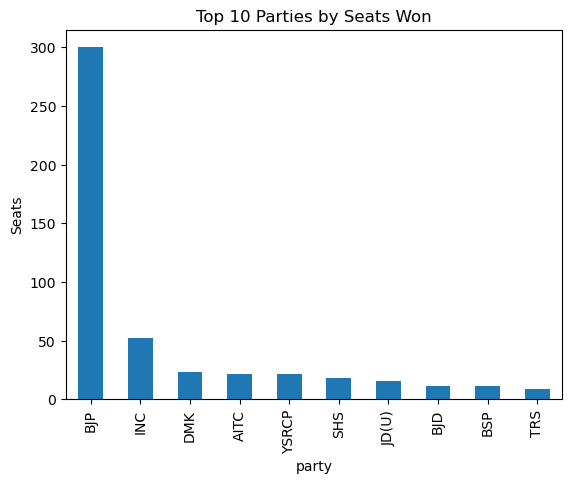

In [38]:
#Seats by Party
seats_by_party.head(10).plot(kind="bar", title="Top 10 Parties by Seats Won")
plt.ylabel("Seats")
plt.show()


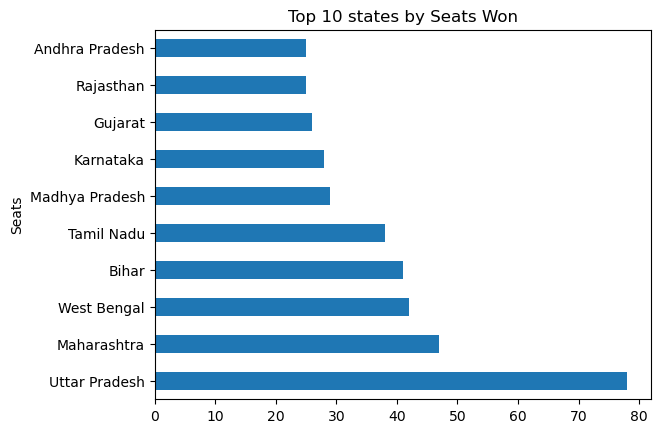

In [41]:
#Seats by State
seats_by_state.head(10).plot(kind="barh",title="Top 10 states by Seats Won")
plt.ylabel("Seats")
plt.show()

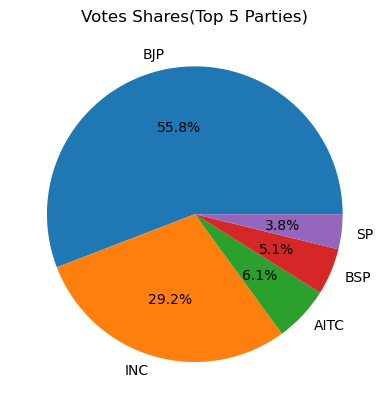

In [42]:
#Vote share Pie
(
    df.groupby("party")["general_votes"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .plot(kind="pie", autopct="%1.1f%%", title="Votes Shares(Top 5 Parties)")
)
plt.ylabel("")
plt.show()

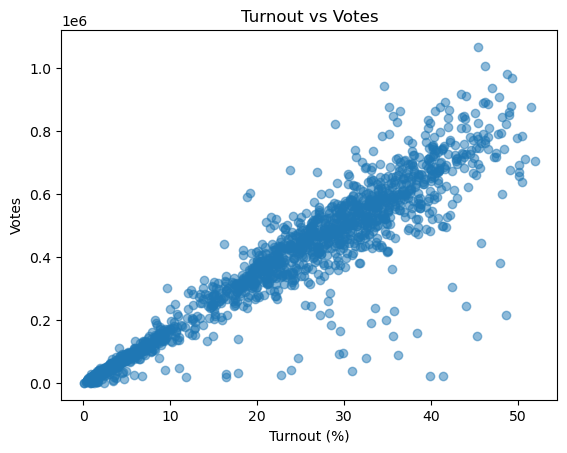

In [45]:
#Turnout Vs Votes
plt.scatter(df["turnout"], df["general_votes"], alpha=0.5)
plt.xlabel("Turnout (%)")
plt.ylabel("Votes")
plt.title("Turnout vs Votes")
plt.show()

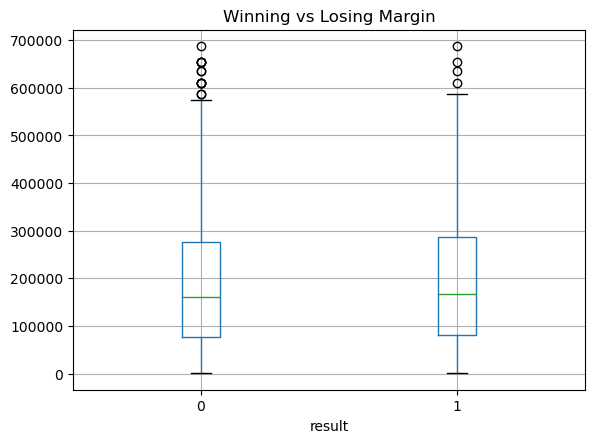

In [46]:
# Margin comparison
df.boxplot(column="margin", by="result")
plt.title("Winning vs Losing Margin")
plt.suptitle("")
plt.show()

Machine learning Model

In [47]:
#imort Machine learning models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [57]:
features=["general_votes",
    "total_votes",
    "turnout",
    "margin",
    "vote_share_pct",
    "party",
    "state"]
df_ml=df[features+["result"]]

#encode Cotegorical feature
le_party = LabelEncoder()
le_state = LabelEncoder()

df_ml["party"] = le_party.fit_transform(df_ml["party"])
df_ml["state"] = le_state.fit_transform(df_ml["state"])


X=df_ml.drop("result", axis=1)
y=df_ml["result"]

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

C:\Users\uk205\AppData\Local\Temp\ipykernel_1828\1544169589.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ml["party"] = le_party.fit_transform(df_ml["party"])
C:\Users\uk205\AppData\Local\Temp\ipykernel_1828\1544169589.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ml["state"] = le_state.fit_transform(df_ml["state"])


In [62]:
# Logistic Regression 
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

log_model= LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)

y_pred_log=log_model.predict(X_test_scaled)
print("Logistic Regrassion Acccuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

Logistic Regrassion Acccuracy: 0.9183222958057395
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       345
           1       0.80      0.88      0.84       108

    accuracy                           0.92       453
   macro avg       0.88      0.91      0.89       453
weighted avg       0.92      0.92      0.92       453



In [63]:
#Random forest Machine Learning Algorithm
rf_model=RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf=rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("Confusion Mstrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 0.9271523178807947
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       345
           1       0.82      0.89      0.85       108

    accuracy                           0.93       453
   macro avg       0.89      0.91      0.90       453
weighted avg       0.93      0.93      0.93       453

Confusion Mstrix:
 [[324  21]
 [ 12  96]]


Model Explainability

In [68]:
feature_importance=pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("feature Importance:\n", feature_importance)

feature Importance:
 turnout           0.315073
general_votes     0.235022
total_votes       0.219946
party             0.086778
margin            0.056447
vote_share_pct    0.046055
state             0.040679
dtype: float64


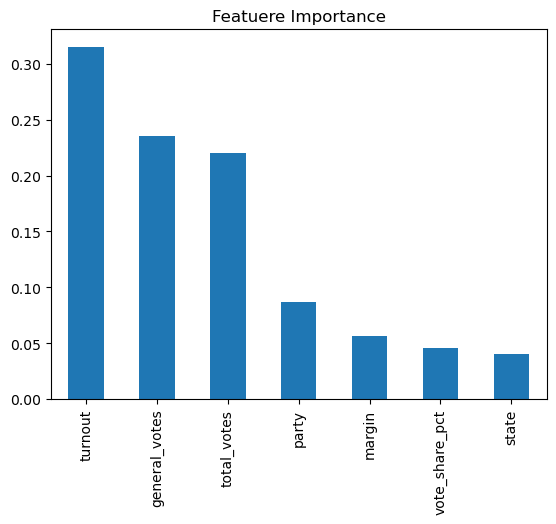

In [69]:
feature_importance.plot(kind="bar", title="Featuere Importance")
plt.show()

In [76]:
df.to_csv("cleaned_election_data.csv", index=False, encoding="utf-8")
seats_by_party.to_csv("seats_by_party.cvs")
seats_by_state.to_csv("seats_by_state.csv")

(df.groupby("party")["general_votes"]
 .sum()
 .sort_values(ascending=False)
 .to_csv("voter_by_party.csv")
)

feature_importance.to_csv("feature_ipmortance.csv")

In [73]:
df.head(5)

,state,constituency,name,winner,party,symbol,gender,criminal_cases,age,category,...,liabilities,general_votes,postal_votes,total_votes,turnout,over_total_votes_polled__in_constituency,total_electors,vote_share_pct,margin,result
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,...,"Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790,99.872275,58227,1
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,...,"Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790,99.953264,58227,0
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,...,"Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790,99.942400,58227,0
3,Telangana,ADILABAD,NOTA,0,NOTA,0,0,0,0.0,0,...,0,13030,6,13036,0.875023,1.225214,1489790,99.953974,58227,0
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,...,"Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690,99.626512,210260,1
